In [1]:
import pandas as pd
from text_authorship.ta_model.base_models import train_logreg

[nltk_data] Downloading package punkt to /home/dm12h/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/dm12h/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv(input())

/home/dm12h/authorship/temp/prepared_df_len_1500_normalized.csv


In [11]:
book_counts = df.groupby('book').size()
df['counts'] = df.book.map(book_counts)
df.head()

,Unnamed: 0,author,book,text,text_w_no_ref,text_no_punkt,lemmas,tags,tokens,counts
0,0,Аверченко,Averchenko_A-T-Averchenko-Sobranie-sochineniy-...,Аркадий Тимофеевич Аверченко\nСобрание сочинен...,deleted deleted deleted Собрание сочинений в ш...,deleted deleted deleted собрание сочинений в ш...,deleted deleted deleted собрание сочинение шес...,deleted deleted deleted 8_NOUN 9_NOUN 5_NUMR 1...,deleted deleted deleted собрание сочинений в ш...,471
1,1,Аверченко,Averchenko_A-T-Averchenko-Sobranie-sochineniy-...,"Что ж, доля истины здесь была. Никуда не денеш...","Что ж , доля истины здесь была . Никуда не ден...",что ж доля истины здесь была никуда не денешьс...,доля истина никуда деться отнять deleted это о...,4_NOUN 6_NOUN 6_ADVB 8_VERB 6_INFN deleted 3_P...,"что ж , доля истины здесь была . никуда не ден...",471
2,2,Аверченко,Averchenko_A-T-Averchenko-Sobranie-sochineniy-...,"Стремясь вырваться из этой беспросветности, он...","Стремясь вырваться из этой беспросветности , о...",стремясь вырваться из этой беспросветности он ...,стремиться вырваться беспросветность обращатьс...,8_GRND 9_INFN 15_NOUN 10_VERB 13_ADJF 5_NOUN d...,"стремясь вырваться из этой беспросветности , о...",471
3,3,Аверченко,Averchenko_A-T-Averchenko-Sobranie-sochineniy-...,Начав сотрудничать в отживавшей свой век «Стре...,Начав сотрудничать в отживавшей свой век « Стр...,начав сотрудничать в отживавшей свой век стрек...,начать сотрудничать отживать свой век стрекоза...,5_GRND 12_INFN 10_PRTF 4_ADJF 3_NOUN 8_NOUN de...,начав сотрудничать в отживавшей свой век « стр...,471
4,4,Аверченко,Averchenko_A-T-Averchenko-Sobranie-sochineniy-...,"— Хотим и название уничтожить, — сказал Аверче...","— Хотим и название уничтожить , — сказал delet...",хотим и название уничтожить сказал deleted буд...,хотеть название уничтожить сказать deleted наз...,5_VERB 8_NOUN 10_INFN 6_VERB deleted 8_INFN 6_...,"— хотим и название уничтожить , — сказал delet...",471


In [12]:
from text_authorship.ta_model.model_selection import train_test_split

In [13]:
df_train, df_test, y_train, y_test = train_test_split(df, share=0.75)

In [6]:
trained_logreg = train_logreg(df_train, target_col="author")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =       975015     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.92476D+04    |proj g|=  2.60160D+02

At iterate   50    f=  1.13747D+03    |proj g|=  2.71912D+01

At iterate  100    f=  3.89799D+02    |proj g|=  3.94934D+00

At iterate  150    f=  2.81748D+02    |proj g|=  1.29977D+00

At iterate  200    f=  2.46297D+02    |proj g|=  6.21764D-01

At iterate  250    f=  2.38653D+02    |proj g|=  1.94475D-01

At iterate  300    f=  2.37414D+02    |proj g|=  3.11830D-01

At iterate  350    f=  2.37110D+02    |proj g|=  8.37467D-02

At iterate  400    f=  2.37032D+02    |proj g|=  1.30761D-02

At iterate  450    f=  2.37014D+02    |proj g|=  7.13107D-03

At iterate  500    f=  2.37010D+02    |proj g|=  3.67143D-03

At iterate  550    f=  2.37009D+02    |proj g|=  2.29268D-03

At iterate  600    f=  2.37009D+02    |proj g|=  5.16795D-03

           * * *

Tit   = 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  6.3min finished


In [17]:
prediction_probs = trained_logreg.predict_proba(df_test)
predictions = prediction_probs.idxmax(axis="columns")

In [24]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y_test)
y_test = encoder.transform(y_test)
predictions = encoder.transform(predictions)

In [72]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(stacking_cm, columns=encoder.classes_, index=encoder.classes_)
cm_df

,Аверченко,Булгаков,Бунин,Гоголь,Горький,Достоевский,Карамзин,Куприн,Лермонтов,Мордовцев,Пушкин,Салтыков-Щедрин,Толстой,Тургенев,Чехов
Аверченко,484,5,0,0,1,6,0,5,0,0,0,1,1,0,0
Булгаков,74,881,57,3,3,5,0,39,0,6,0,2,5,0,3
Бунин,11,3,515,0,0,5,0,9,0,0,0,0,1,0,0
Гоголь,0,1,1,146,0,7,0,1,2,0,1,0,4,0,0
Горький,5,2,15,0,272,1,0,17,1,2,0,2,7,0,1
Достоевский,22,9,23,13,7,1696,1,7,2,4,2,60,12,8,3
Карамзин,0,0,1,0,0,0,23,0,0,3,3,0,0,0,0
Куприн,15,5,4,5,5,12,0,432,0,3,1,2,4,1,1
Лермонтов,2,2,6,10,4,9,1,13,34,6,18,0,10,4,4
Мордовцев,1,3,10,0,6,4,0,3,0,337,2,1,3,0,0


In [1]:
df

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/dm12h/PycharmProjects/Authorship/venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_4274/1396537375.py", line 1, in <module>
    df
NameError: name 'df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/dm12h/PycharmProjects/Authorship/venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/home/dm12h/PycharmProjects/Authorship/venv/lib/python3.10/site-packages/IPython/core/ultratb.py", line 1428, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/home/dm12h/PycharmProjects/Authorship/venv/lib/python3.10/site-packages/IPython/core/ultratb.py", line 1319, in structured_traceback
    return VerboseTB.structured_trac

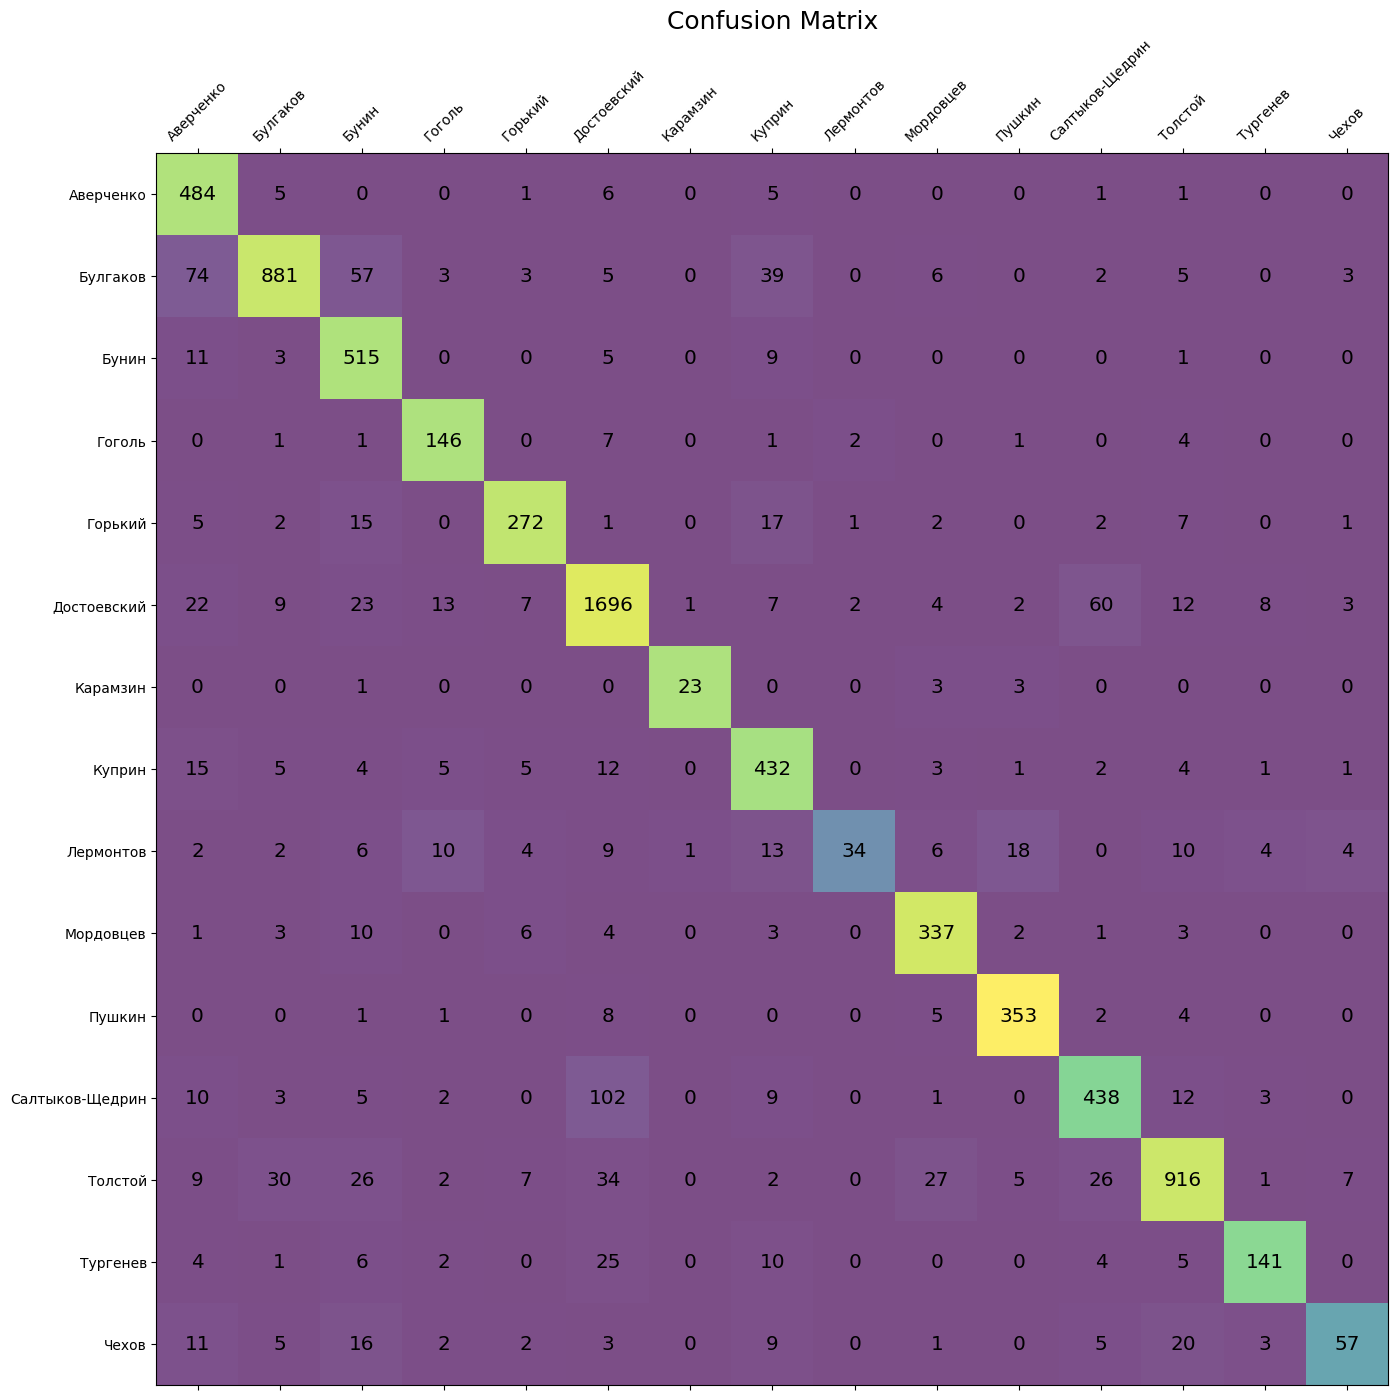

In [52]:
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 16))
color_map = np.full_like(cm, 0, dtype=np.float64)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='x-large')
        color_map[i,j] = cm[i,j] / (np.sum(cm[i]) + np.sum(cm[:,j]) - cm[i,j])
ax.matshow(color_map, cmap=mpl.colormaps['viridis'], alpha=0.7)
authors = encoder.classes_
ax.set_xticks(range(len(authors)))
ax.set_xticklabels(authors, rotation=45)
ax.set_yticks(range(len(authors)))
ax.set_yticklabels(authors)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [53]:
from sklearn.metrics import f1_score

In [54]:
stacking_f1 = f1_score(y_test, predictions, average='macro')
stacking_f1

0.8008641443325104

In [60]:
import collections.abc as collections
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/dm12h/PycharmProjects/Authorship/venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_15225/1165629792.py", line 2, in <module>
    from transformers import BertTokenizer, BertForSequenceClassification
  File "/home/dm12h/PycharmProjects/Authorship/venv/lib/python3.10/site-packages/transformers/__init__.py", line 26, in <module>
    from . import dependency_versions_check
  File "/home/dm12h/PycharmProjects/Authorship/venv/lib/python3.10/site-packages/transformers/dependency_versions_check.py", line 17, in <module>
    from .utils.versions import require_version, require_version_core
  File "/home/dm12h/PycharmProjects/Authorship/venv/lib/python3.10/site-packages/transformers/utils/__init__.py", line 30, in <module>
    from .generic import (
  File "/home/dm12h/PycharmProjects/Authorship/venv/lib/python3.10/site-packages/t

In [23]:
tokenizer = BertTokenizer.from_pretrained('bert_pretrained', do_lower_case=False)
bert = BertForSequenceClassification.from_pretrained('bert_pretrained')

In [24]:
import torch

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
bert = bert.to(device)

In [32]:
def collate_fn(batch: list[str]):
    tokenized = tokenizer(batch, padding=True, truncation=True, max_length=512, return_tensors='pt')
    tokenized = {k: v.to(device) for k, v in tokenized.items()}
    return tokenized

loader = DataLoader(df_test['text_w_no_ref'].tolist(), batch_size=32, shuffle=False, collate_fn=collate_fn)

In [33]:
from tqdm.notebook import tqdm

bert.eval()

predictions_b = []

with torch.inference_mode():
    for batch in tqdm(loader):
        output = bert(**batch)
        logits = output.get('logits')
        labels = torch.argmax(logits, dim=1).detach().cpu().tolist()
        predictions_b.extend(labels)

  0%|          | 0/247 [00:00<?, ?it/s]

In [34]:
bert_cm = confusion_matrix(y_test, predictions_b)
bert_cm = pd.DataFrame(bert_cm, index = encoder.classes_, columns=encoder.classes_)

In [35]:
bert_cm

,Аверченко,Булгаков,Бунин,Гоголь,Горький,Достоевский,Карамзин,Куприн,Лермонтов,Мордовцев,Пушкин,Салтыков-Щедрин,Толстой,Тургенев,Чехов
Аверченко,481,9,1,0,0,0,0,10,0,0,0,0,0,0,2
Булгаков,39,921,40,0,6,0,0,70,0,0,0,0,1,0,1
Бунин,3,0,527,0,1,0,0,12,0,0,0,0,0,1,0
Гоголь,1,0,0,114,0,14,1,0,3,0,1,7,13,3,6
Горький,0,0,1,0,209,0,0,7,0,57,0,0,2,6,43
Достоевский,1,9,69,7,3,1649,0,20,0,5,0,43,40,18,5
Карамзин,0,0,0,0,0,0,23,0,0,1,6,0,0,0,0
Куприн,6,0,5,0,0,0,0,468,0,0,0,0,1,0,10
Лермонтов,0,0,0,10,0,4,7,1,15,5,3,0,2,74,2
Мордовцев,0,0,3,0,0,0,0,7,0,351,1,1,3,0,4


In [36]:
bert_f1 = f1_score(y_test, predictions_b, average='macro')
bert_f1

0.7585355633709442

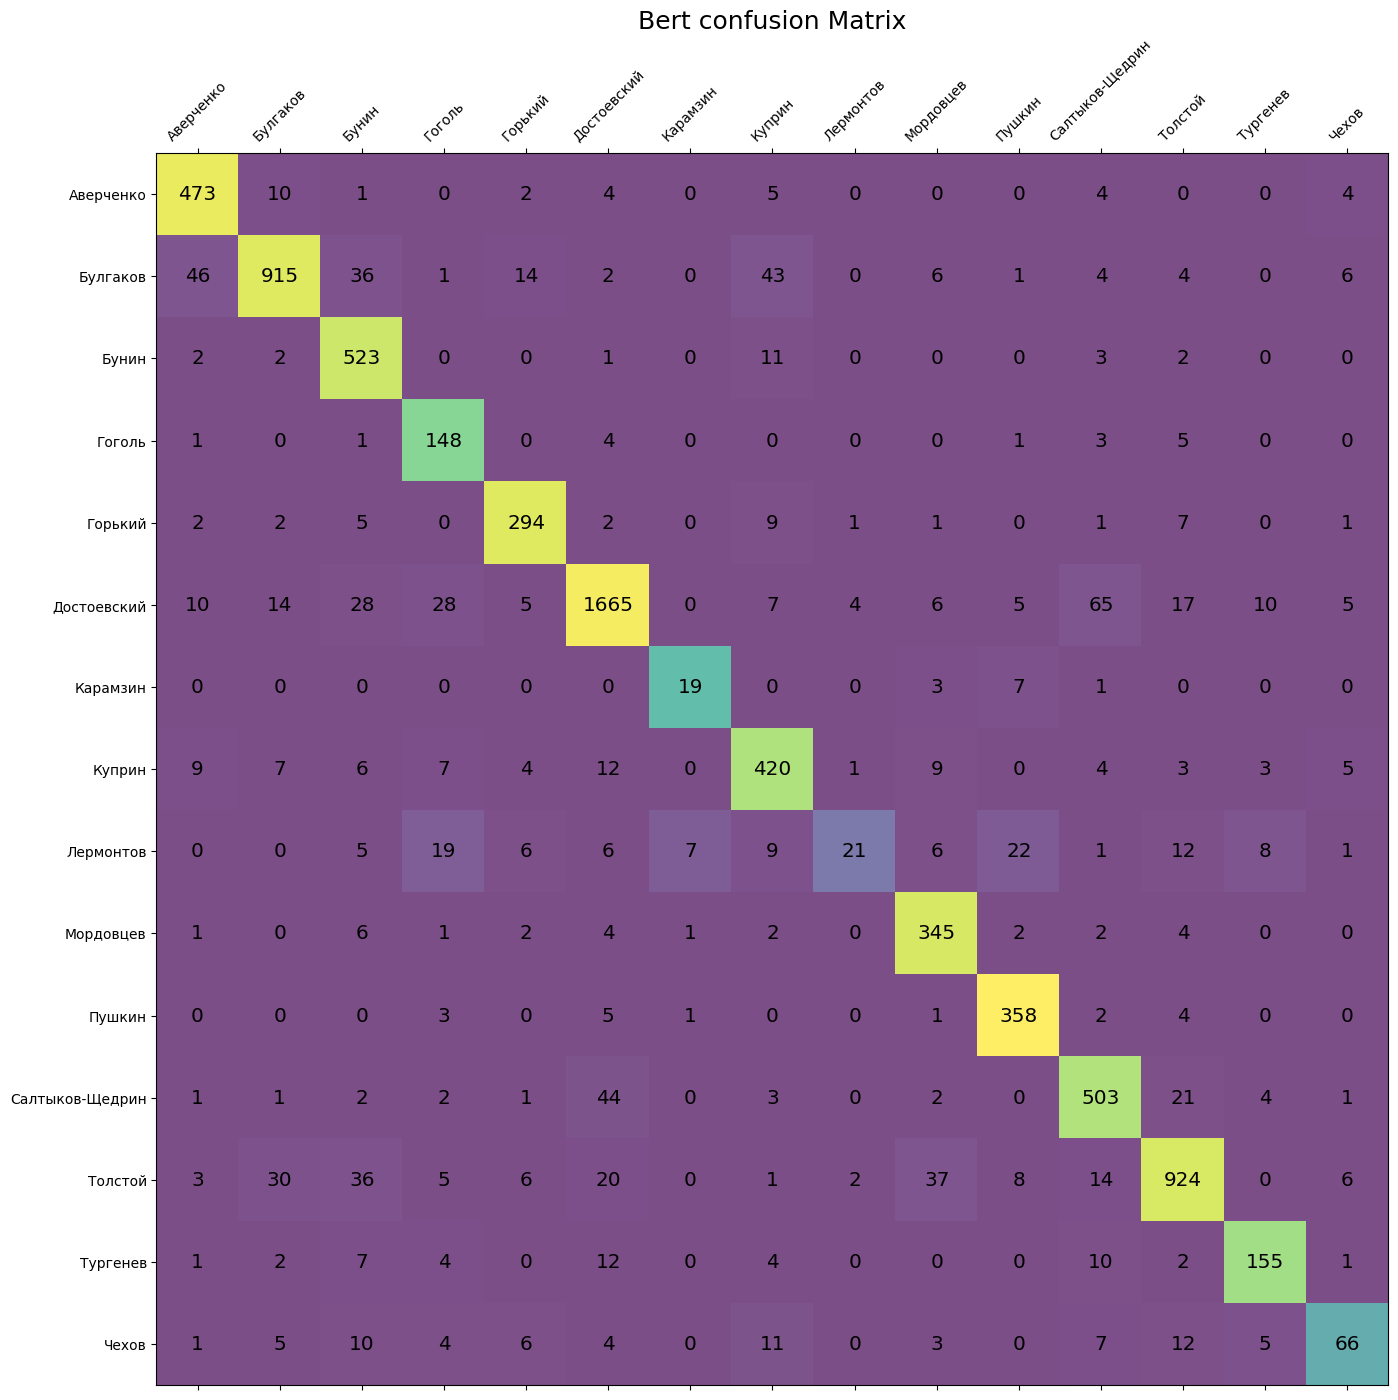

In [17]:
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 16))
color_map = np.full_like(cm, 0, dtype=np.float64)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='x-large')
        color_map[i,j] = cm[i,j] / (np.sum(cm[i]) + np.sum(cm[:,j]) - cm[i,j])
ax.matshow(color_map, cmap=mpl.colormaps['viridis'], alpha=0.7)
authors = encoder.classes_
ax.set_xticks(range(len(authors)))
ax.set_xticklabels(authors, rotation=45)
ax.set_yticks(range(len(authors)))
ax.set_yticklabels(authors)
plt.title('Bert confusion Matrix', fontsize=18)
plt.show()

In [9]:
# import numpy as np
# with open("/home/dm12h/Pictures/df.txt") as f:
#     data = f.read().strip().split()
# lines =[]
# start = 0
# for i in range(15):
#     lines.append(list(map(int, data[start: start+15])))
#     start+=16
# cm = np.array(lines)

In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

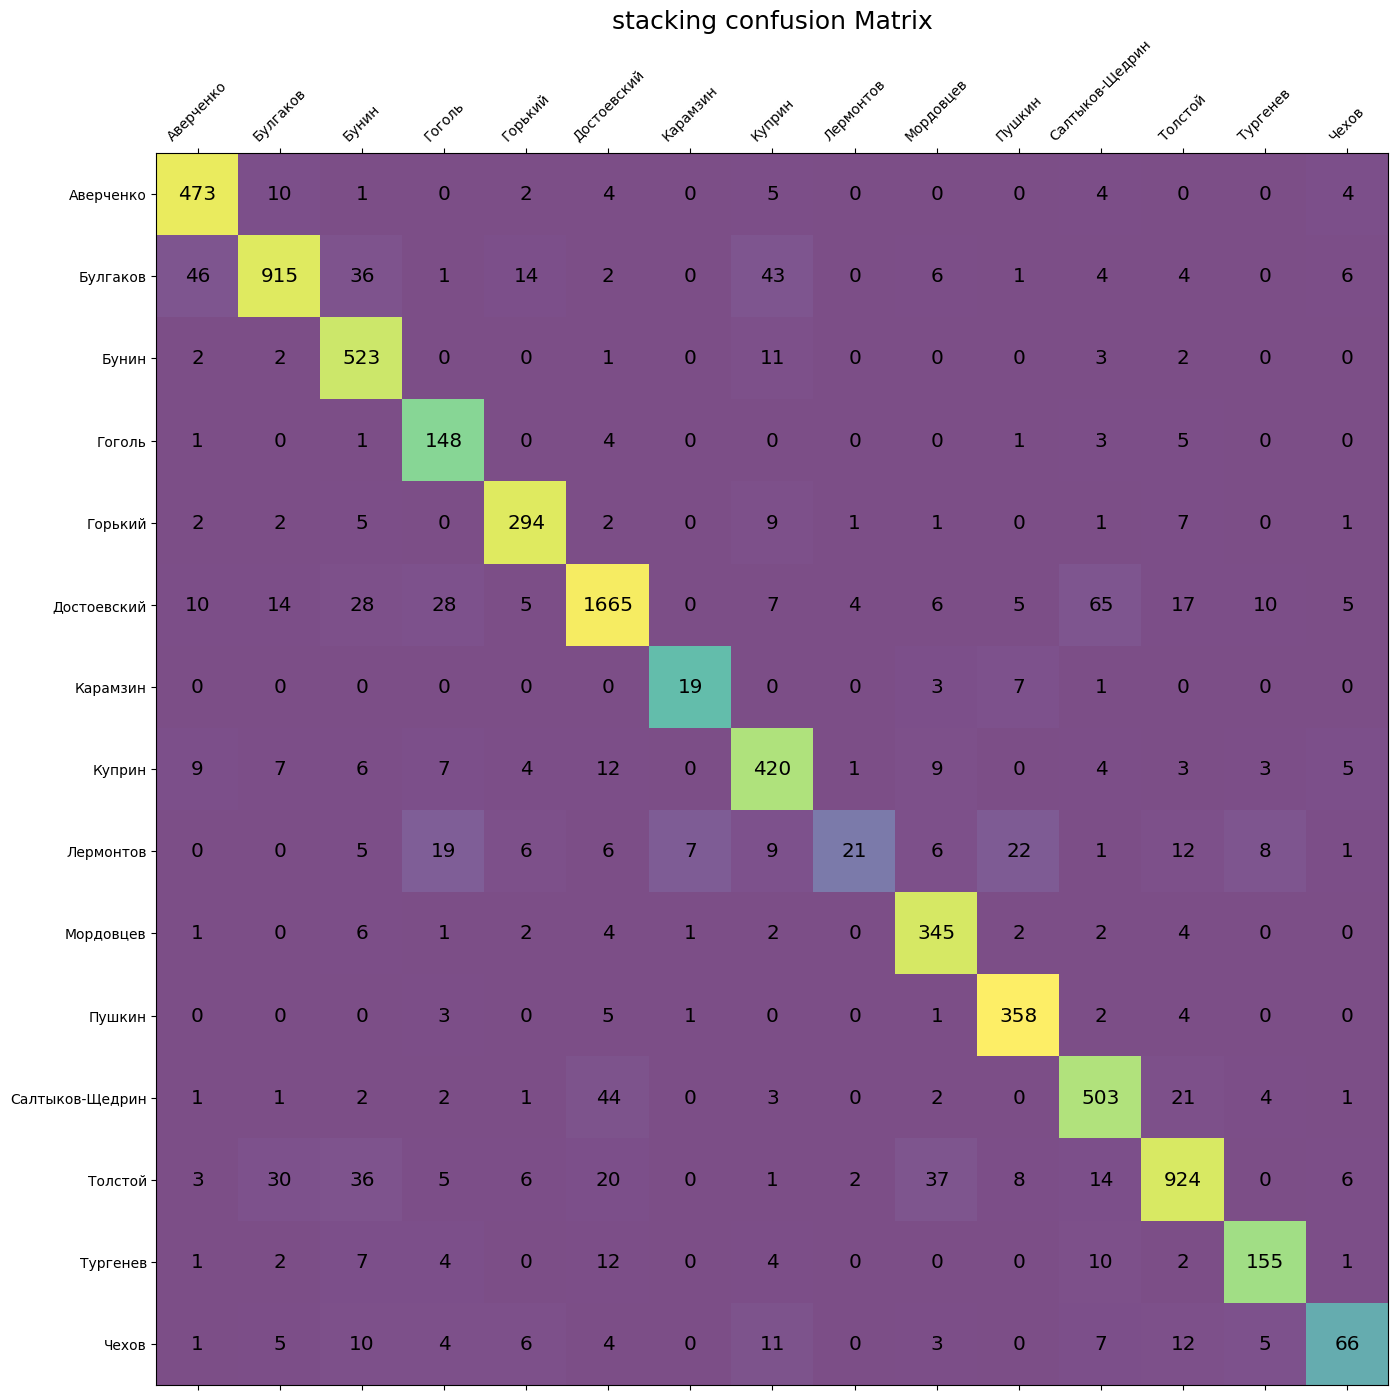

In [18]:
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 16))
color_map = np.full_like(cm, 0, dtype=np.float64)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='x-large')
        color_map[i,j] = cm[i,j] / (np.sum(cm[i]) + np.sum(cm[:,j]) - cm[i,j])
ax.matshow(color_map, cmap=mpl.colormaps['viridis'], alpha=0.7)
authors = encoder.classes_
ax.set_xticks(range(len(authors)))
ax.set_xticklabels(authors, rotation=45)
ax.set_yticks(range(len(authors)))
ax.set_yticklabels(authors)
plt.title('stacking confusion Matrix', fontsize=18)
plt.show()